In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import logging

from jax import random
import wandb

from src.models import make_invVAE_loss, make_invVAE_eval
from src.data import get_image_dataset, NumpyLoader
from src.utils.training import setup_training, train_loop
from experiments.inv_vae_mnist_default import get_config

In [3]:
os.environ['WANDB_NOTEBOOK_NAME'] = 'train_vae.ipynb'
# ^ W&B doesn't know how to handle VS Code notebooks.

wandb.login()

wandb: Currently logged in as: jamesallingham (invariance-learners). Use `wandb login --relogin` to force relogin


True

In [4]:
config = get_config()
rng = random.PRNGKey(config.random_seed)

In [5]:
train_dataset, test_dataset, val_dataset = get_image_dataset(
    dataset_name=config.dataset_name,
    **(config.get('dataset', {})),
)
train_loader = NumpyLoader(train_dataset, config.batch_size)
val_loader = NumpyLoader(val_dataset, config.batch_size)
test_loader = NumpyLoader(test_dataset, config.batch_size)

In [6]:
setup_rng, rng = random.split(rng)
init_data = train_dataset[0][0]

model, state = setup_training(config, setup_rng, init_data)

+---------------------------+------------------+-----------+-----------+---------+
| Name                      | Shape            | Size      | Mean      | Std     |
+---------------------------+------------------+-----------+-----------+---------+
| params/dec/hidden0/bias   | (256,)           | 256       | 0.0       | 0.0     |
| params/dec/hidden0/kernel | (3, 3, 256, 256) | 589,824   | -2.22e-05 | 0.0208  |
| params/dec/hidden1/bias   | (128,)           | 128       | 0.0       | 0.0     |
| params/dec/hidden1/kernel | (3, 3, 256, 128) | 294,912   | 2.75e-05  | 0.0208  |
| params/dec/hidden2/bias   | (64,)            | 64        | 0.0       | 0.0     |
| params/dec/hidden2/kernel | (3, 3, 128, 64)  | 73,728    | 3.25e-05  | 0.0294  |
| params/dec/norm0/bias     | (256,)           | 256       | 0.0       | 0.0     |
| params/dec/norm0/scale    | (256,)           | 256       | 1.0       | 0.0     |
| params/dec/norm1/bias     | (128,)           | 128       | 0.0       | 0.0     |
| pa

  0%|          | 0/25 [00:00<?, ?it/s]

epoch:   1 - train loss: 1.33860, val_loss: 1.20885, β: 10.0, lr: 0.00014


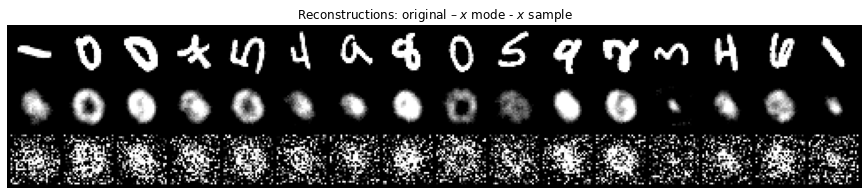

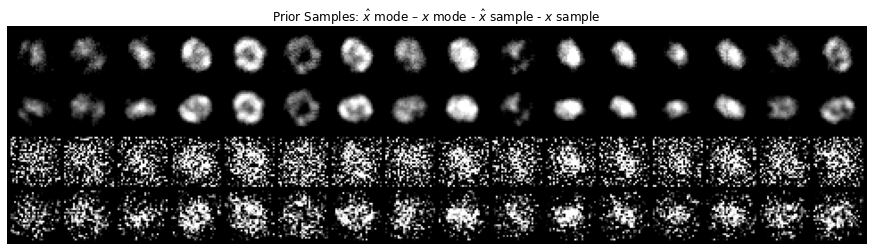

Best val_loss
epoch:   2 - train loss: 1.19577, val_loss: 1.18768, β: 9.9, lr: 0.00018


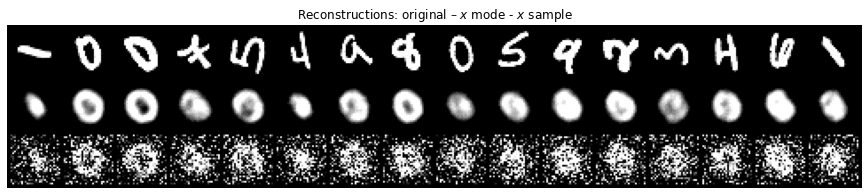

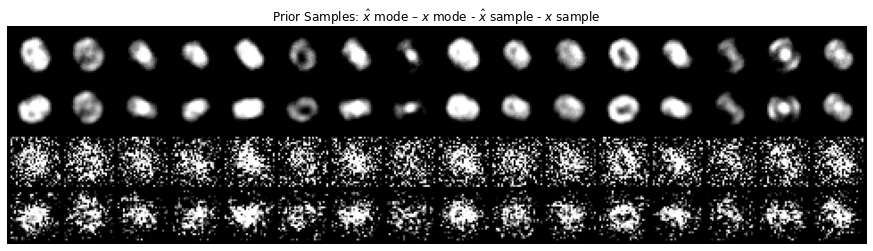

Best val_loss
epoch:   3 - train loss: 1.17994, val_loss: 1.17135, β: 9.7, lr: 0.00022


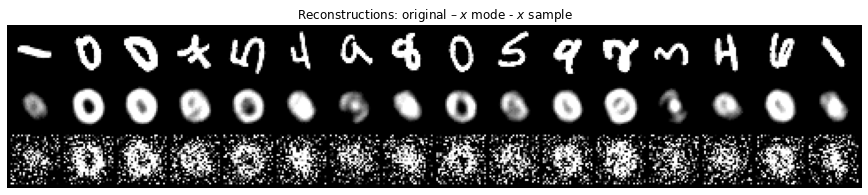

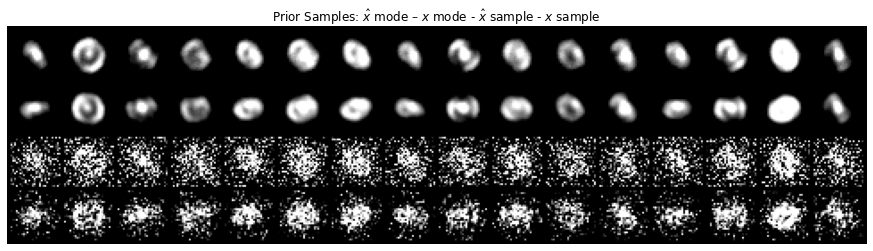

Best val_loss
epoch:   4 - train loss: 1.16610, val_loss: 1.15694, β: 9.4, lr: 0.00026


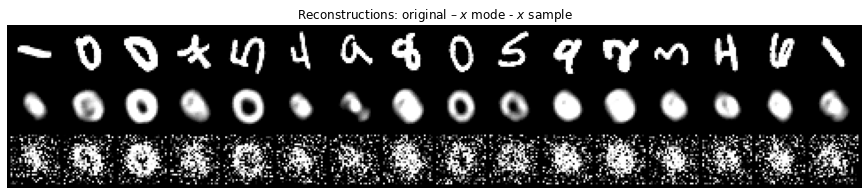

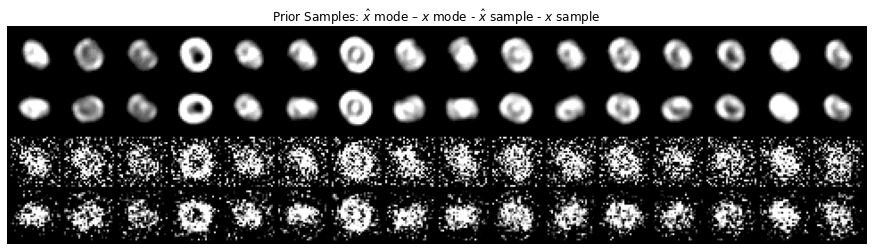

Best val_loss
epoch:   5 - train loss: 1.14989, val_loss: 1.13938, β: 9.1, lr: 0.00030


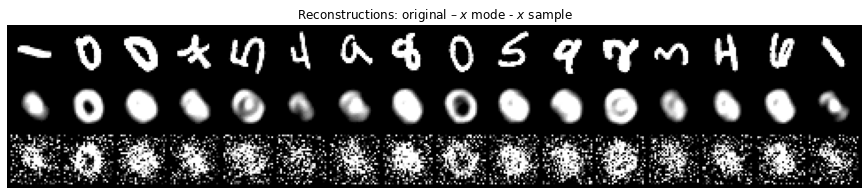

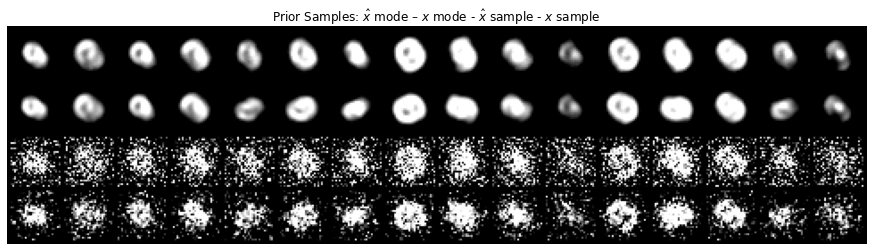

Best val_loss
epoch:   6 - train loss: 1.13195, val_loss: 1.12477, β: 8.8, lr: 0.00030


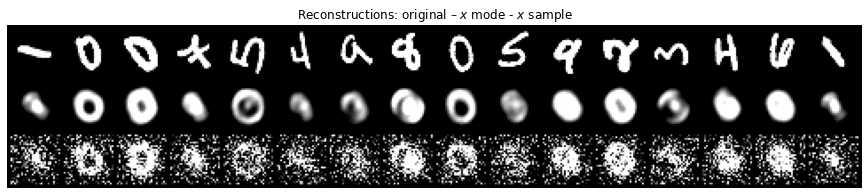

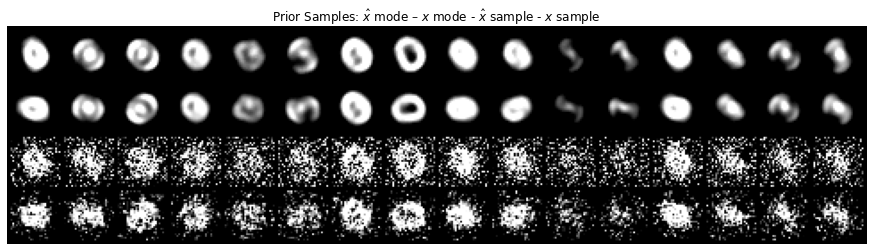

Best val_loss
epoch:   7 - train loss: 1.11675, val_loss: 1.11052, β: 8.4, lr: 0.00029


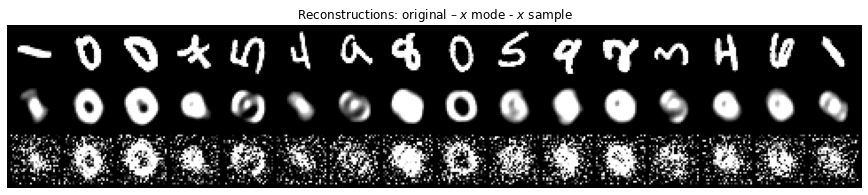

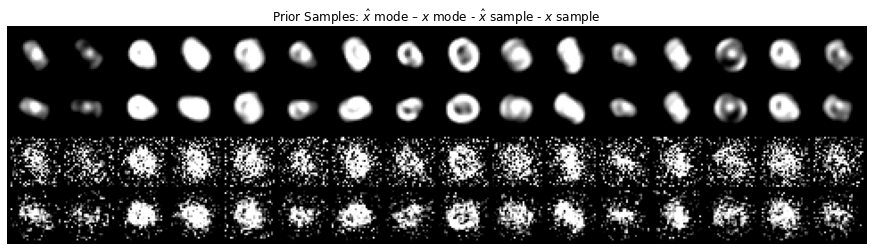

Best val_loss
epoch:   8 - train loss: 1.10112, val_loss: 1.09278, β: 7.9, lr: 0.00029


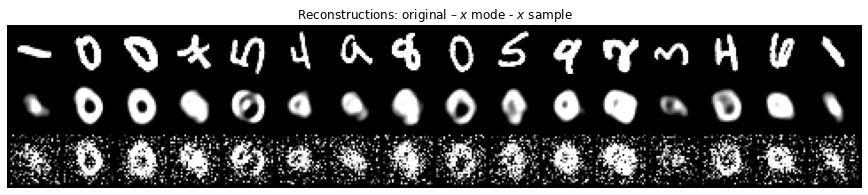

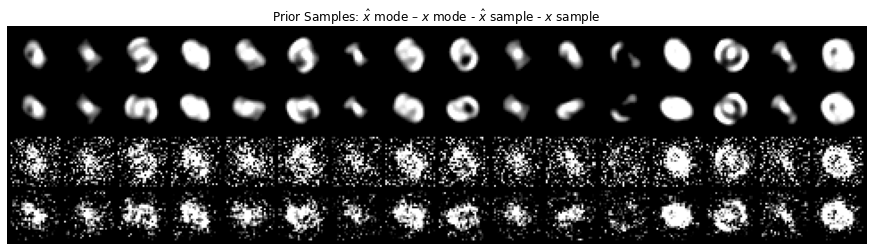

Best val_loss
epoch:   9 - train loss: 1.08302, val_loss: 1.07461, β: 7.4, lr: 0.00027


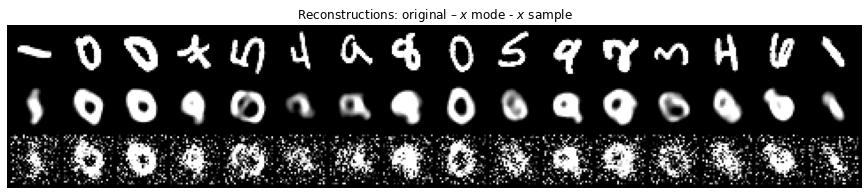

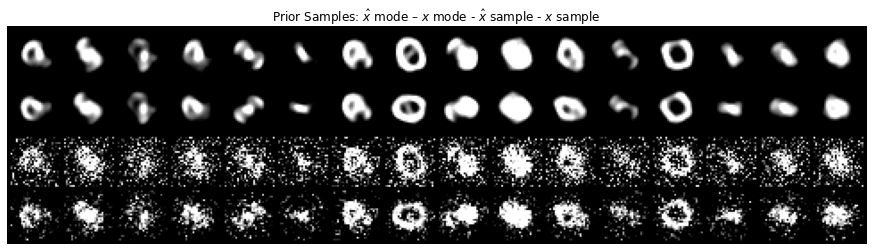

Best val_loss
epoch:  10 - train loss: 1.05998, val_loss: 1.05119, β: 6.9, lr: 0.00026


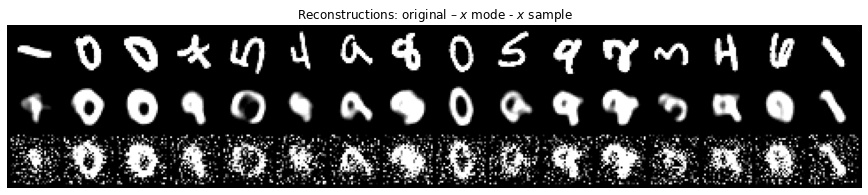

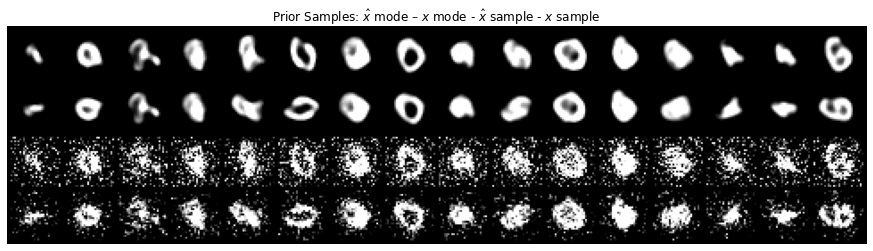

Best val_loss
epoch:  11 - train loss: 1.03588, val_loss: 1.02153, β: 6.3, lr: 0.00025


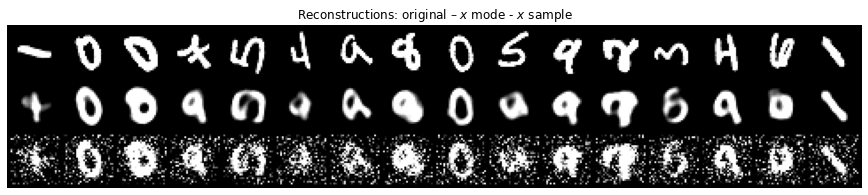

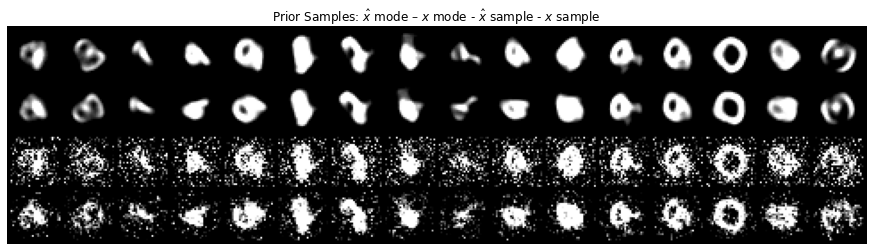

Best val_loss
epoch:  12 - train loss: 1.01069, val_loss: 0.99649, β: 5.8, lr: 0.00023


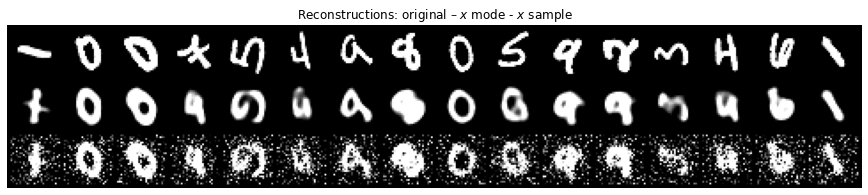

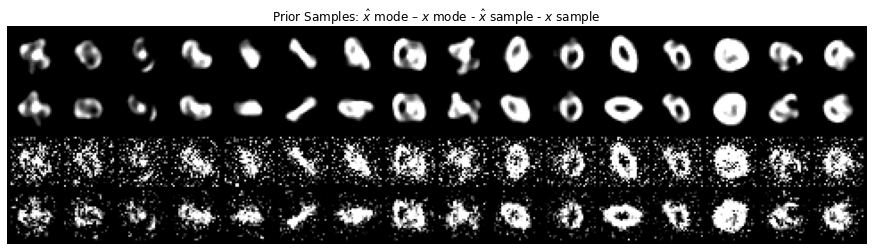

Best val_loss
epoch:  13 - train loss: 0.98336, val_loss: 0.96977, β: 5.2, lr: 0.00021


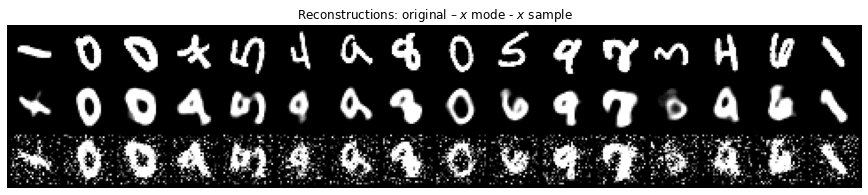

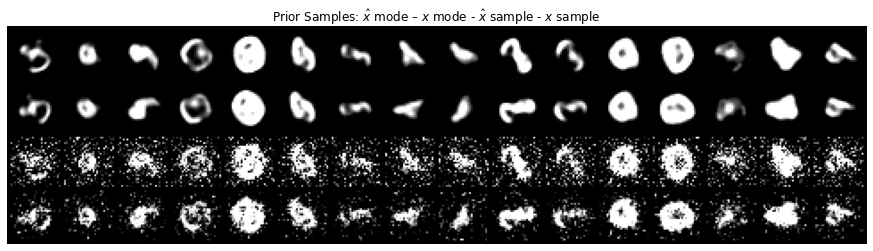

Best val_loss
epoch:  14 - train loss: 0.95276, val_loss: 0.93814, β: 4.7, lr: 0.00019


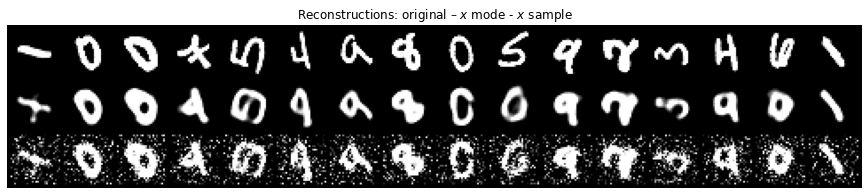

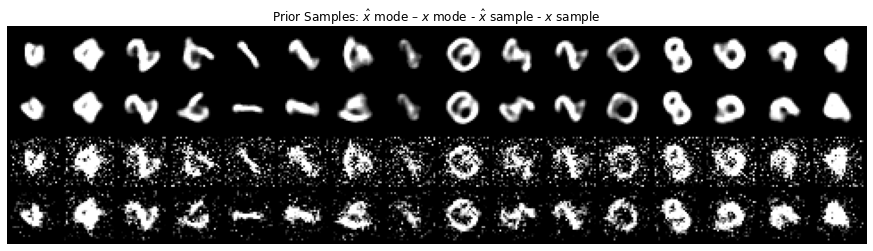

Best val_loss
epoch:  15 - train loss: 0.92089, val_loss: 0.90756, β: 4.1, lr: 0.00017


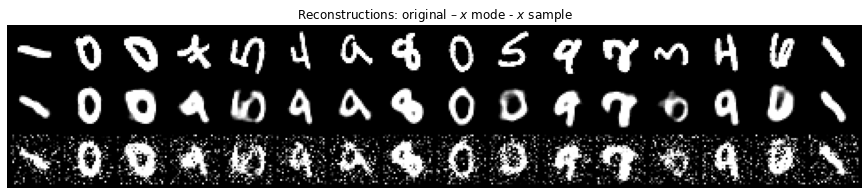

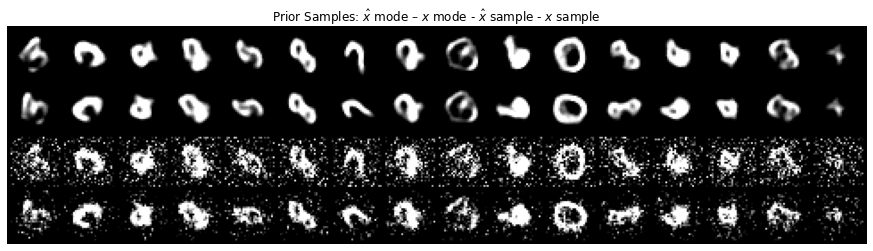

Best val_loss
epoch:  16 - train loss: 0.88675, val_loss: 0.86712, β: 3.6, lr: 0.00015


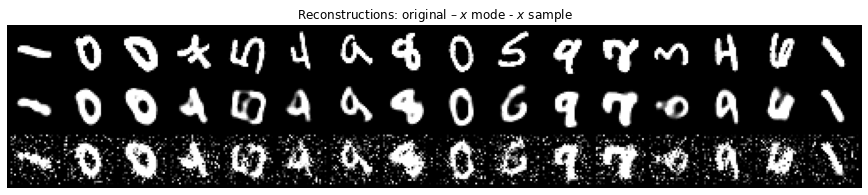

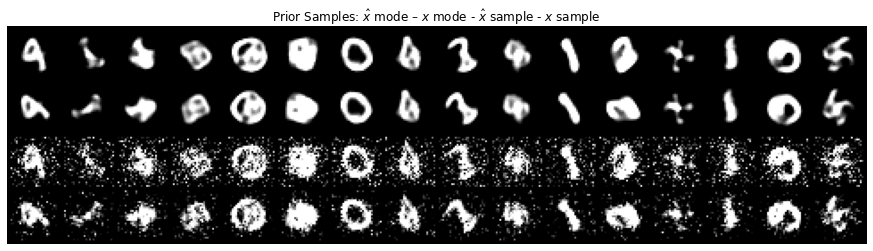

Best val_loss
epoch:  17 - train loss: 0.84916, val_loss: 0.83203, β: 3.1, lr: 0.00013


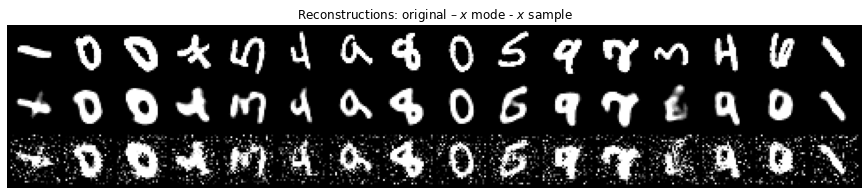

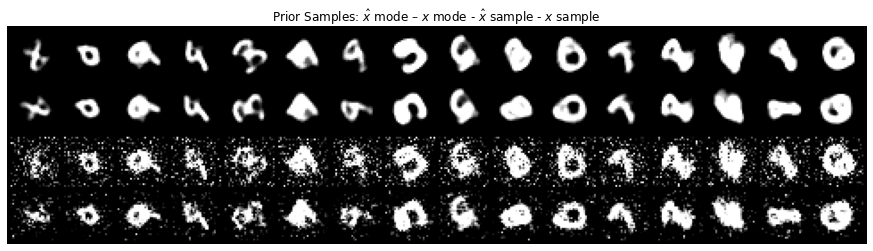

Best val_loss
epoch:  18 - train loss: 0.81154, val_loss: 0.79491, β: 2.6, lr: 0.00011


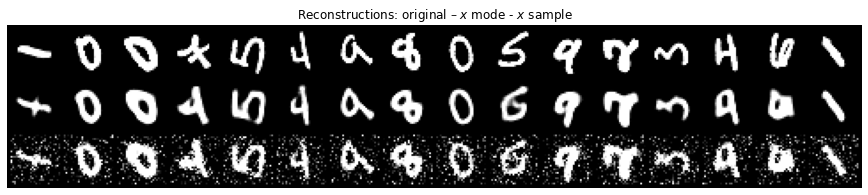

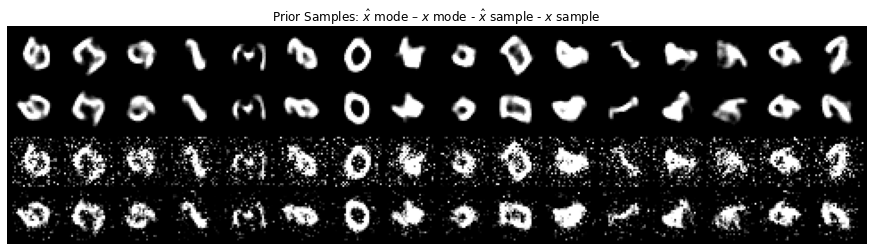

Best val_loss
epoch:  19 - train loss: 0.77363, val_loss: 0.75815, β: 2.2, lr: 0.00009


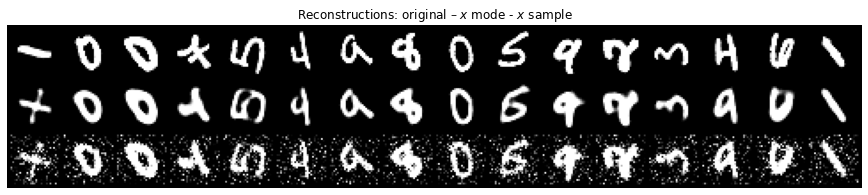

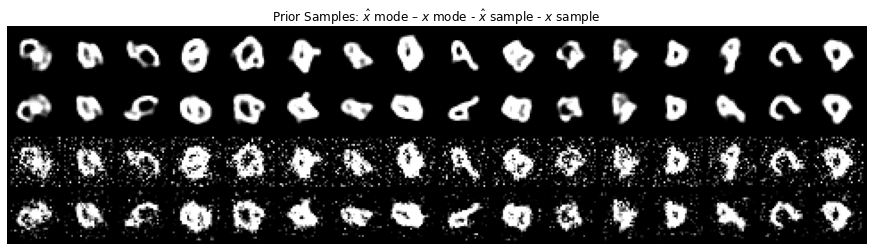

Best val_loss
epoch:  20 - train loss: 0.73788, val_loss: 0.72353, β: 1.9, lr: 0.00007


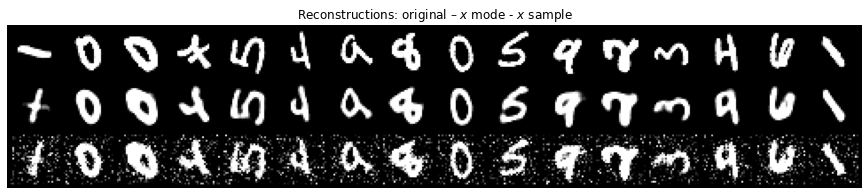

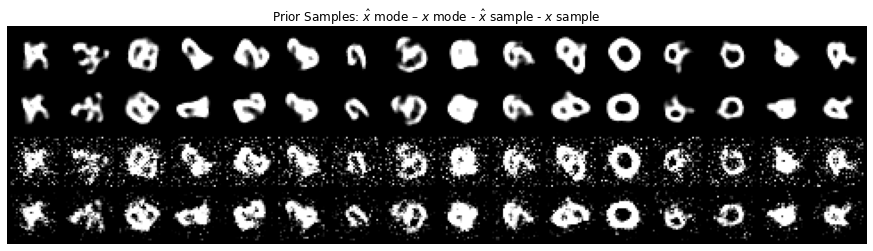

Best val_loss
epoch:  21 - train loss: 0.70322, val_loss: 0.68898, β: 1.6, lr: 0.00006


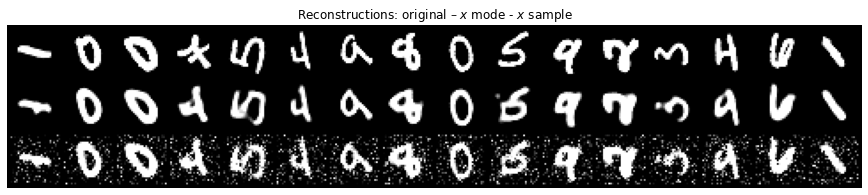

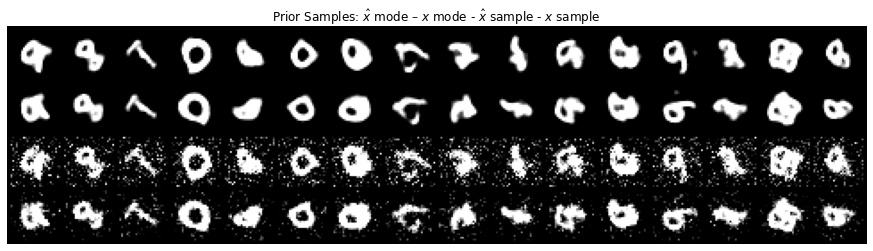

Best val_loss
epoch:  22 - train loss: 0.67252, val_loss: 0.66282, β: 1.3, lr: 0.00005


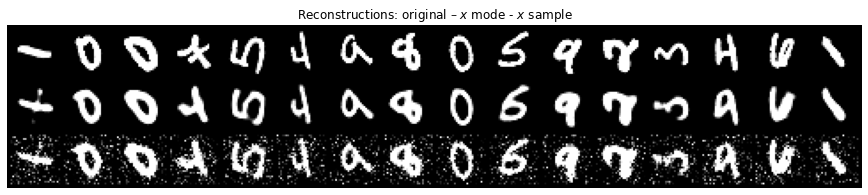

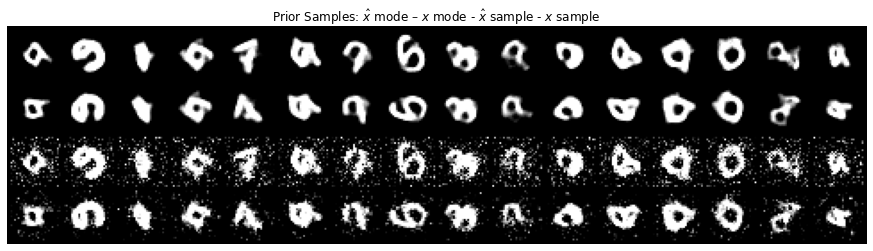

Best val_loss
epoch:  23 - train loss: 0.64710, val_loss: 0.64256, β: 1.1, lr: 0.00004


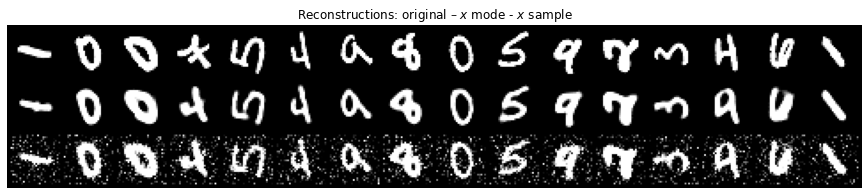

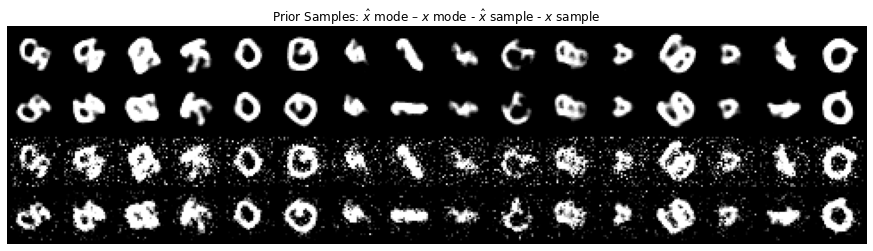

Best val_loss
epoch:  24 - train loss: 0.62702, val_loss: 0.62427, β: 1.0, lr: 0.00003


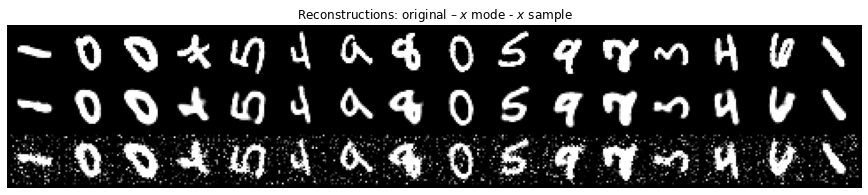

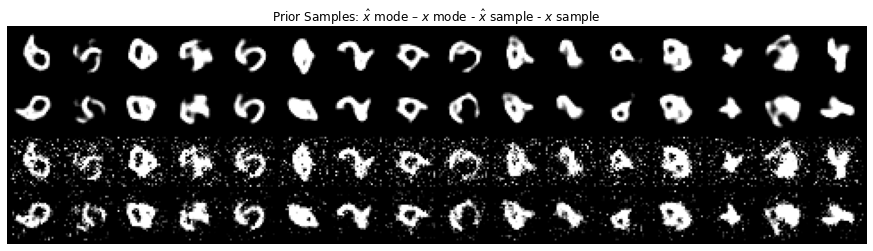

Best val_loss
epoch:  25 - train loss: 0.61321, val_loss: 0.61388, β: 1.0, lr: 0.00003


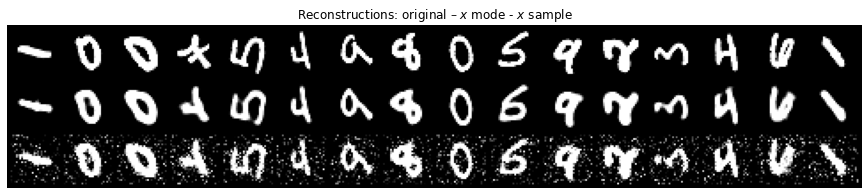

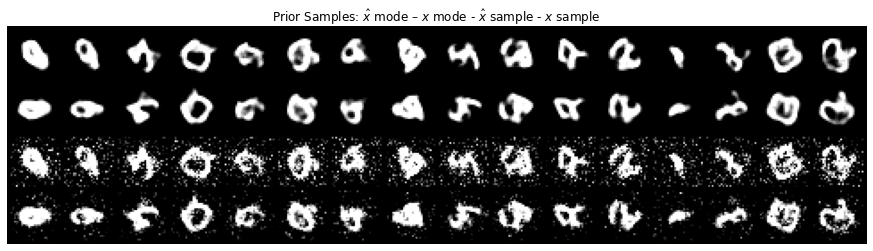

Best val_loss


In [7]:
state = train_loop(
    model, state, config, rng, make_invVAE_loss, make_invVAE_eval, train_loader, val_loader,
    # test_loader,
    wandb_kwargs={
        'mode': 'offline',
        # 'notes': 'Comparing learning w/ and w/o invariances for different amounts of transformation in the data.',
        # 'tags': ['inv_vae_testing', 'invariance full', 'transformation π/2'],
    },
)